Assignment 5 : Prediction of the Prices of Toyota Corolla

In assignment 5, you will use the sample file provided above (Used_cars_price_prediction.ipynb), to train four Machine Learning algorithms namely Random Forest, Decision Tree, SVM and XGBoost to predict the price of used Toyota Corolla.  The dataset for this assignment as follows: ToyotaCorolla.csvDownload ToyotaCorolla.csv

You will use the following features ( Age, KM, FuelType, HP, MetColor, Automatic, CC, Doors, & Weight) from the dataset (ToyotaCorolla.csv) to predict the price of a used Toyota Corolla.  "FuelType" is a categorical variable and will need to be  "One-hot encoded" (see "Used_cars_price_prediction.ipynb"),

You will need to mount your drive so that you can read the dataset :

# Mount your google drive
from google.colab import drive
drive.mount('/content/drive')
# then read the file to a dataframe:
# Read file into dataframe "df" - u provide the path to the file in your google drive
# locate the file in the drive after mounting then right click the file, copy path and paste between the ' ' below.
file_path =('/content/drive/MyDrive/Data/ToyotaCorolla.csv') # reading file "ToyotaCorolla.csv' from Google Drive in the "Data" folder under MyDrive
df = pd.read_csv(file_path) # this is for reading csv file
#file_path =('/content/drive/MyDrive/Data/korea_data.xlsx') # reading file "korea_data.xlsx' from Google Drive in the "Data" folder under MyDrive')
#df = pd.read_excel(file_path) # this is for reading csv file
What to submit:

The jupyter notebook (LastNameFirstNameA5).

Be sure to include a comparison of the accuracy of the results and which learning model you would recommend based on your results.




Preview Unavailable
HOJAGULYYEV_ AHMET _A5. ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.svm import SVR
sns.set_style('darkgrid')

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/toyota.csv')
dataset.head()

Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel  90         1          0  2000      3    1165
1  13750   23  72937   Diesel  90         1          0  2000      3    1165
2  13950   24  41711   Diesel  90         1          0  2000      3    1165
3  14950   26  48000   Diesel  90         0          0  2000      3    1165
4  13750   30  38500   Diesel  90         0          0  2000      3    1170

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [ ]:
dataset.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [ ]:

dataset.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
dataset.describe().T

count          mean           std     min      25%      50%  \
Price      1436.0  10730.824513   3626.964585  4350.0   8450.0   9900.0   
Age        1436.0     55.947075     18.599988     1.0     44.0     61.0   
KM         1436.0  68533.259749  37506.448872     1.0  43000.0  63389.5   
HP         1436.0    101.502089     14.981080    69.0     90.0    110.0   
MetColor   1436.0      0.674791      0.468616     0.0      0.0      1.0   
Automatic  1436.0      0.055710      0.229441     0.0      0.0      0.0   
CC         1436.0   1566.827994    187.182436  1300.0   1400.0   1600.0   
Doors      1436.0      4.033426      0.952677     2.0      3.0      4.0   
Weight     1436.0   1072.459610     52.641120  1000.0   1040.0   1070.0   

                75%       max  
Price      11950.00   32500.0  
Age           70.00      80.0  
KM         87020.75  243000.0  
HP           110.00     192.0  
MetColor       1.00       1.0  
Automatic      0.00       1.0  
CC          1600.00    2000.0  
Doors          5.00       5.0  
Weight      1085.00    1615.0

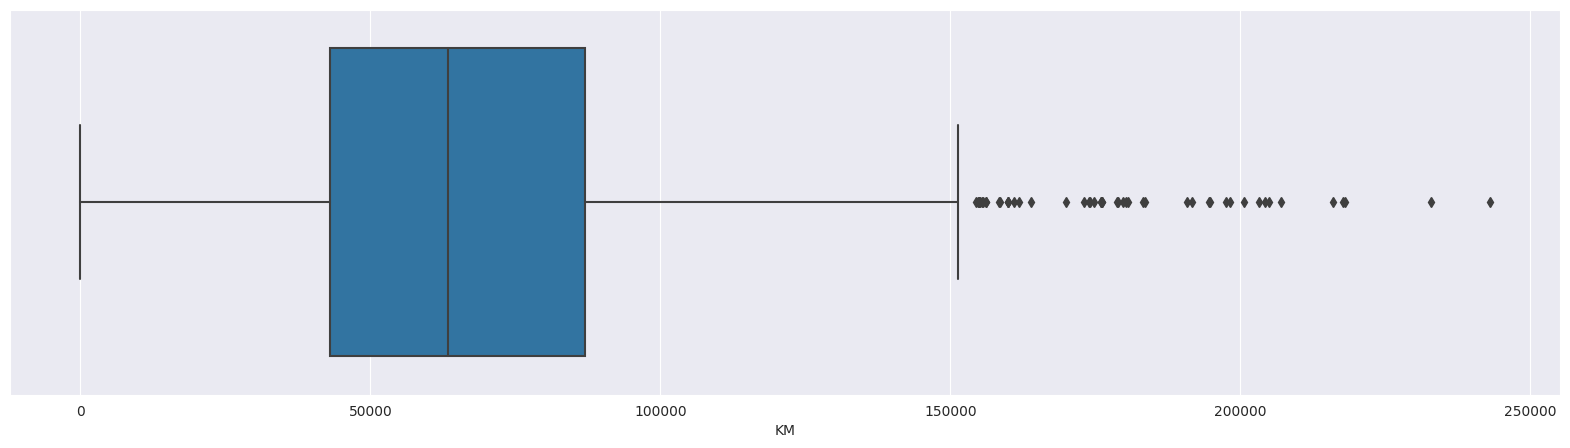

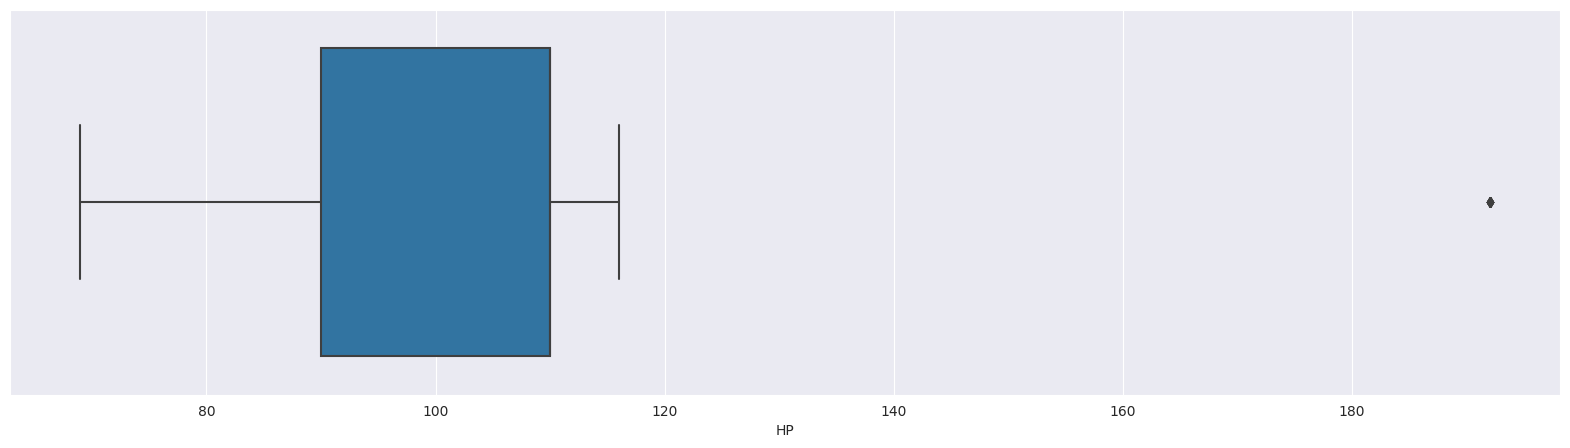

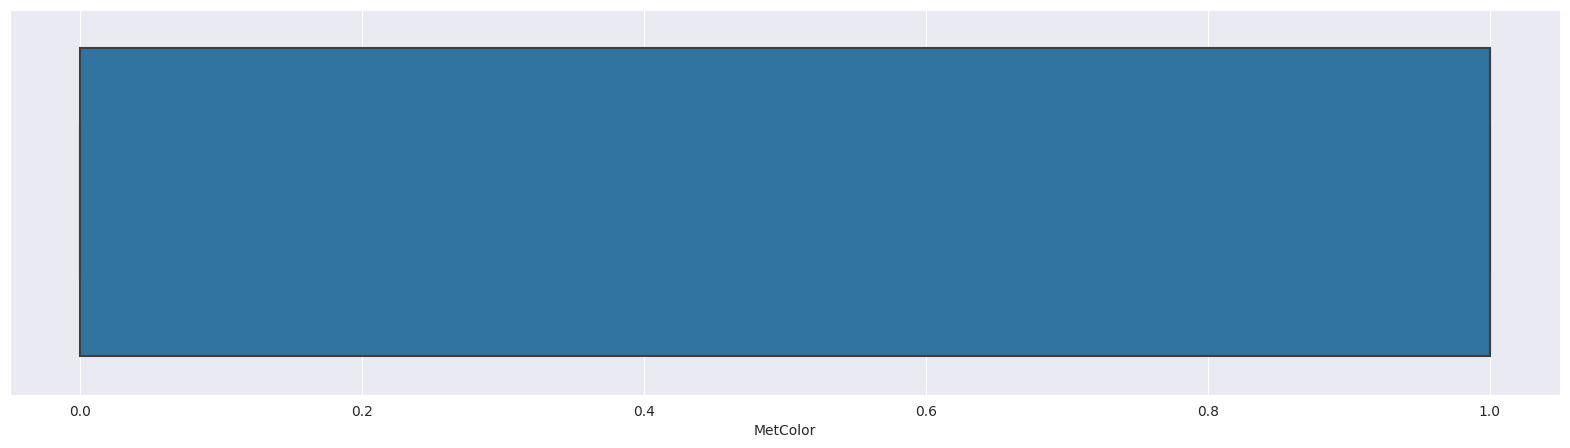

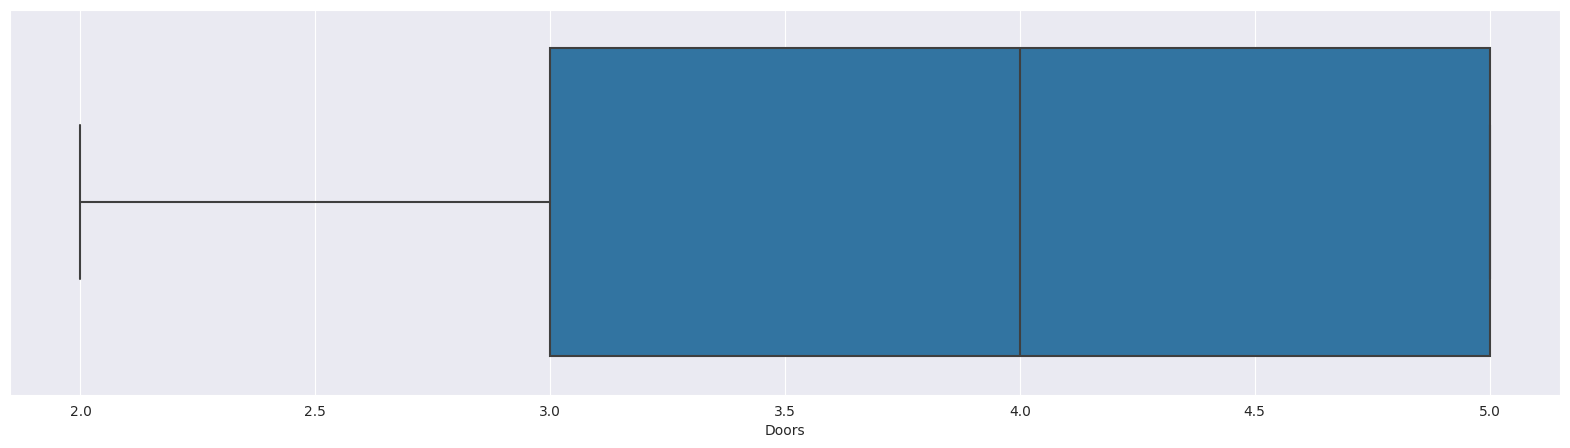

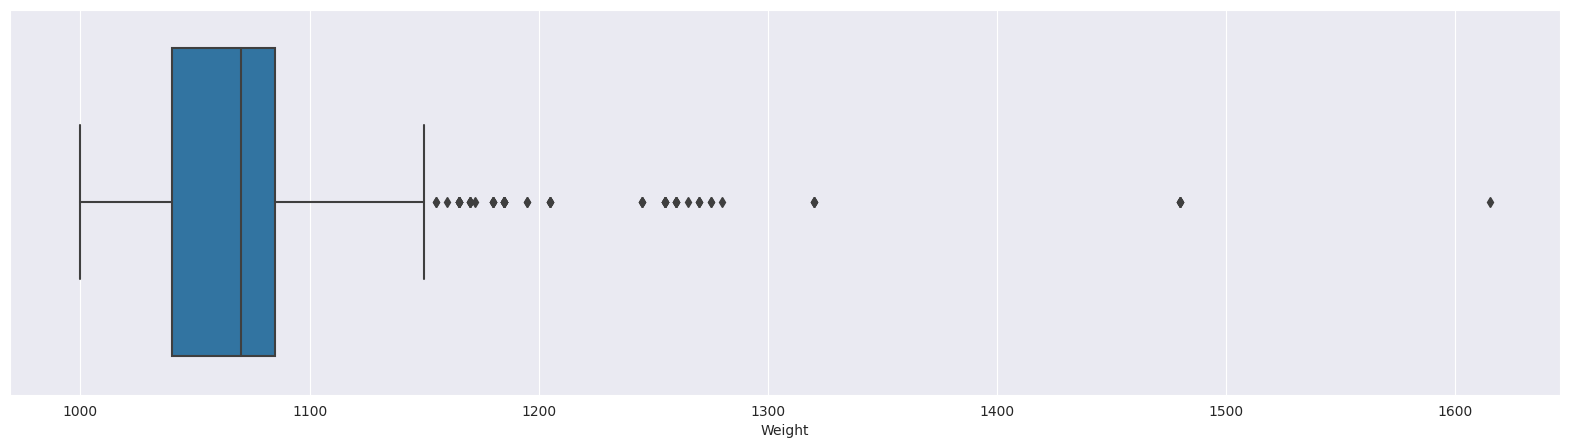

In [ ]:
for col in dataset:
    if dataset[col].dtype == np.float64 or dataset[col].dtype == np.int64:
        fig_dims = (20, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.boxplot(x=dataset[col],ax=ax)

In [ ]:
# Yes=1, No=0

dataset["Automatic"].value_counts()

0    1356
1      80
Name: Automatic, dtype: int64

In [ ]:
dataset["HP"].value_counts().sort_values()

71       1
73       1
98       2
116      9
192     11
107     21
69      34
90      36
72      73
97     164
86     249
110    835
Name: HP, dtype: int64

In [ ]:
dataset = dataset[dataset["HP"]<192]
dataset_num = dataset.drop("FuelType", axis=1)

In [ ]:
dataset_num.HP.max()

116

In [ ]:
dataset_num.HP.min()

69

In [ ]:
dataset_num.HP.mean()

100.80350877192983

In [ ]:
dataset_num.HP.std()

12.744159888960098

In [ ]:
dataset_num.HP.count()

1425

In [ ]:
# Check correlations
data_corr = dataset_num.corr()
data_corr

Price       Age        KM        HP  MetColor  Automatic  \
Price      1.000000 -0.880405 -0.571133  0.213047  0.118349   0.040218   
Age       -0.880405  1.000000  0.501137 -0.100082 -0.113717   0.029083   
KM        -0.571133  0.501137  1.000000 -0.344114 -0.084129  -0.083921   
HP         0.213047 -0.100082 -0.344114  1.000000  0.084874   0.028888   
MetColor   0.118349 -0.113717 -0.084129  0.084874  1.000000  -0.019950   
Automatic  0.040218  0.029083 -0.083921  0.028888 -0.019950   1.000000   
CC         0.141969 -0.120069  0.314098 -0.008601  0.037980  -0.067405   
Doors      0.204451 -0.156376 -0.041538  0.137874  0.080618  -0.028747   
Weight     0.560796 -0.456870 -0.013588 -0.014136  0.063768   0.062488   

                 CC     Doors    Weight  
Price      0.141969  0.204451  0.560796  
Age       -0.120069 -0.156376 -0.456870  
KM         0.314098 -0.041538 -0.013588  
HP        -0.008601  0.137874 -0.014136  
MetColor   0.037980  0.080618  0.063768  
Automatic -0.067405 -0.028747  0.062488  
CC         1.000000  0.133075  0.646262  
Doors      0.133075  1.000000  0.318032  
Weight     0.646262  0.318032  1.000000

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.heatmap(data_corr,annot=True)

<Axes: >

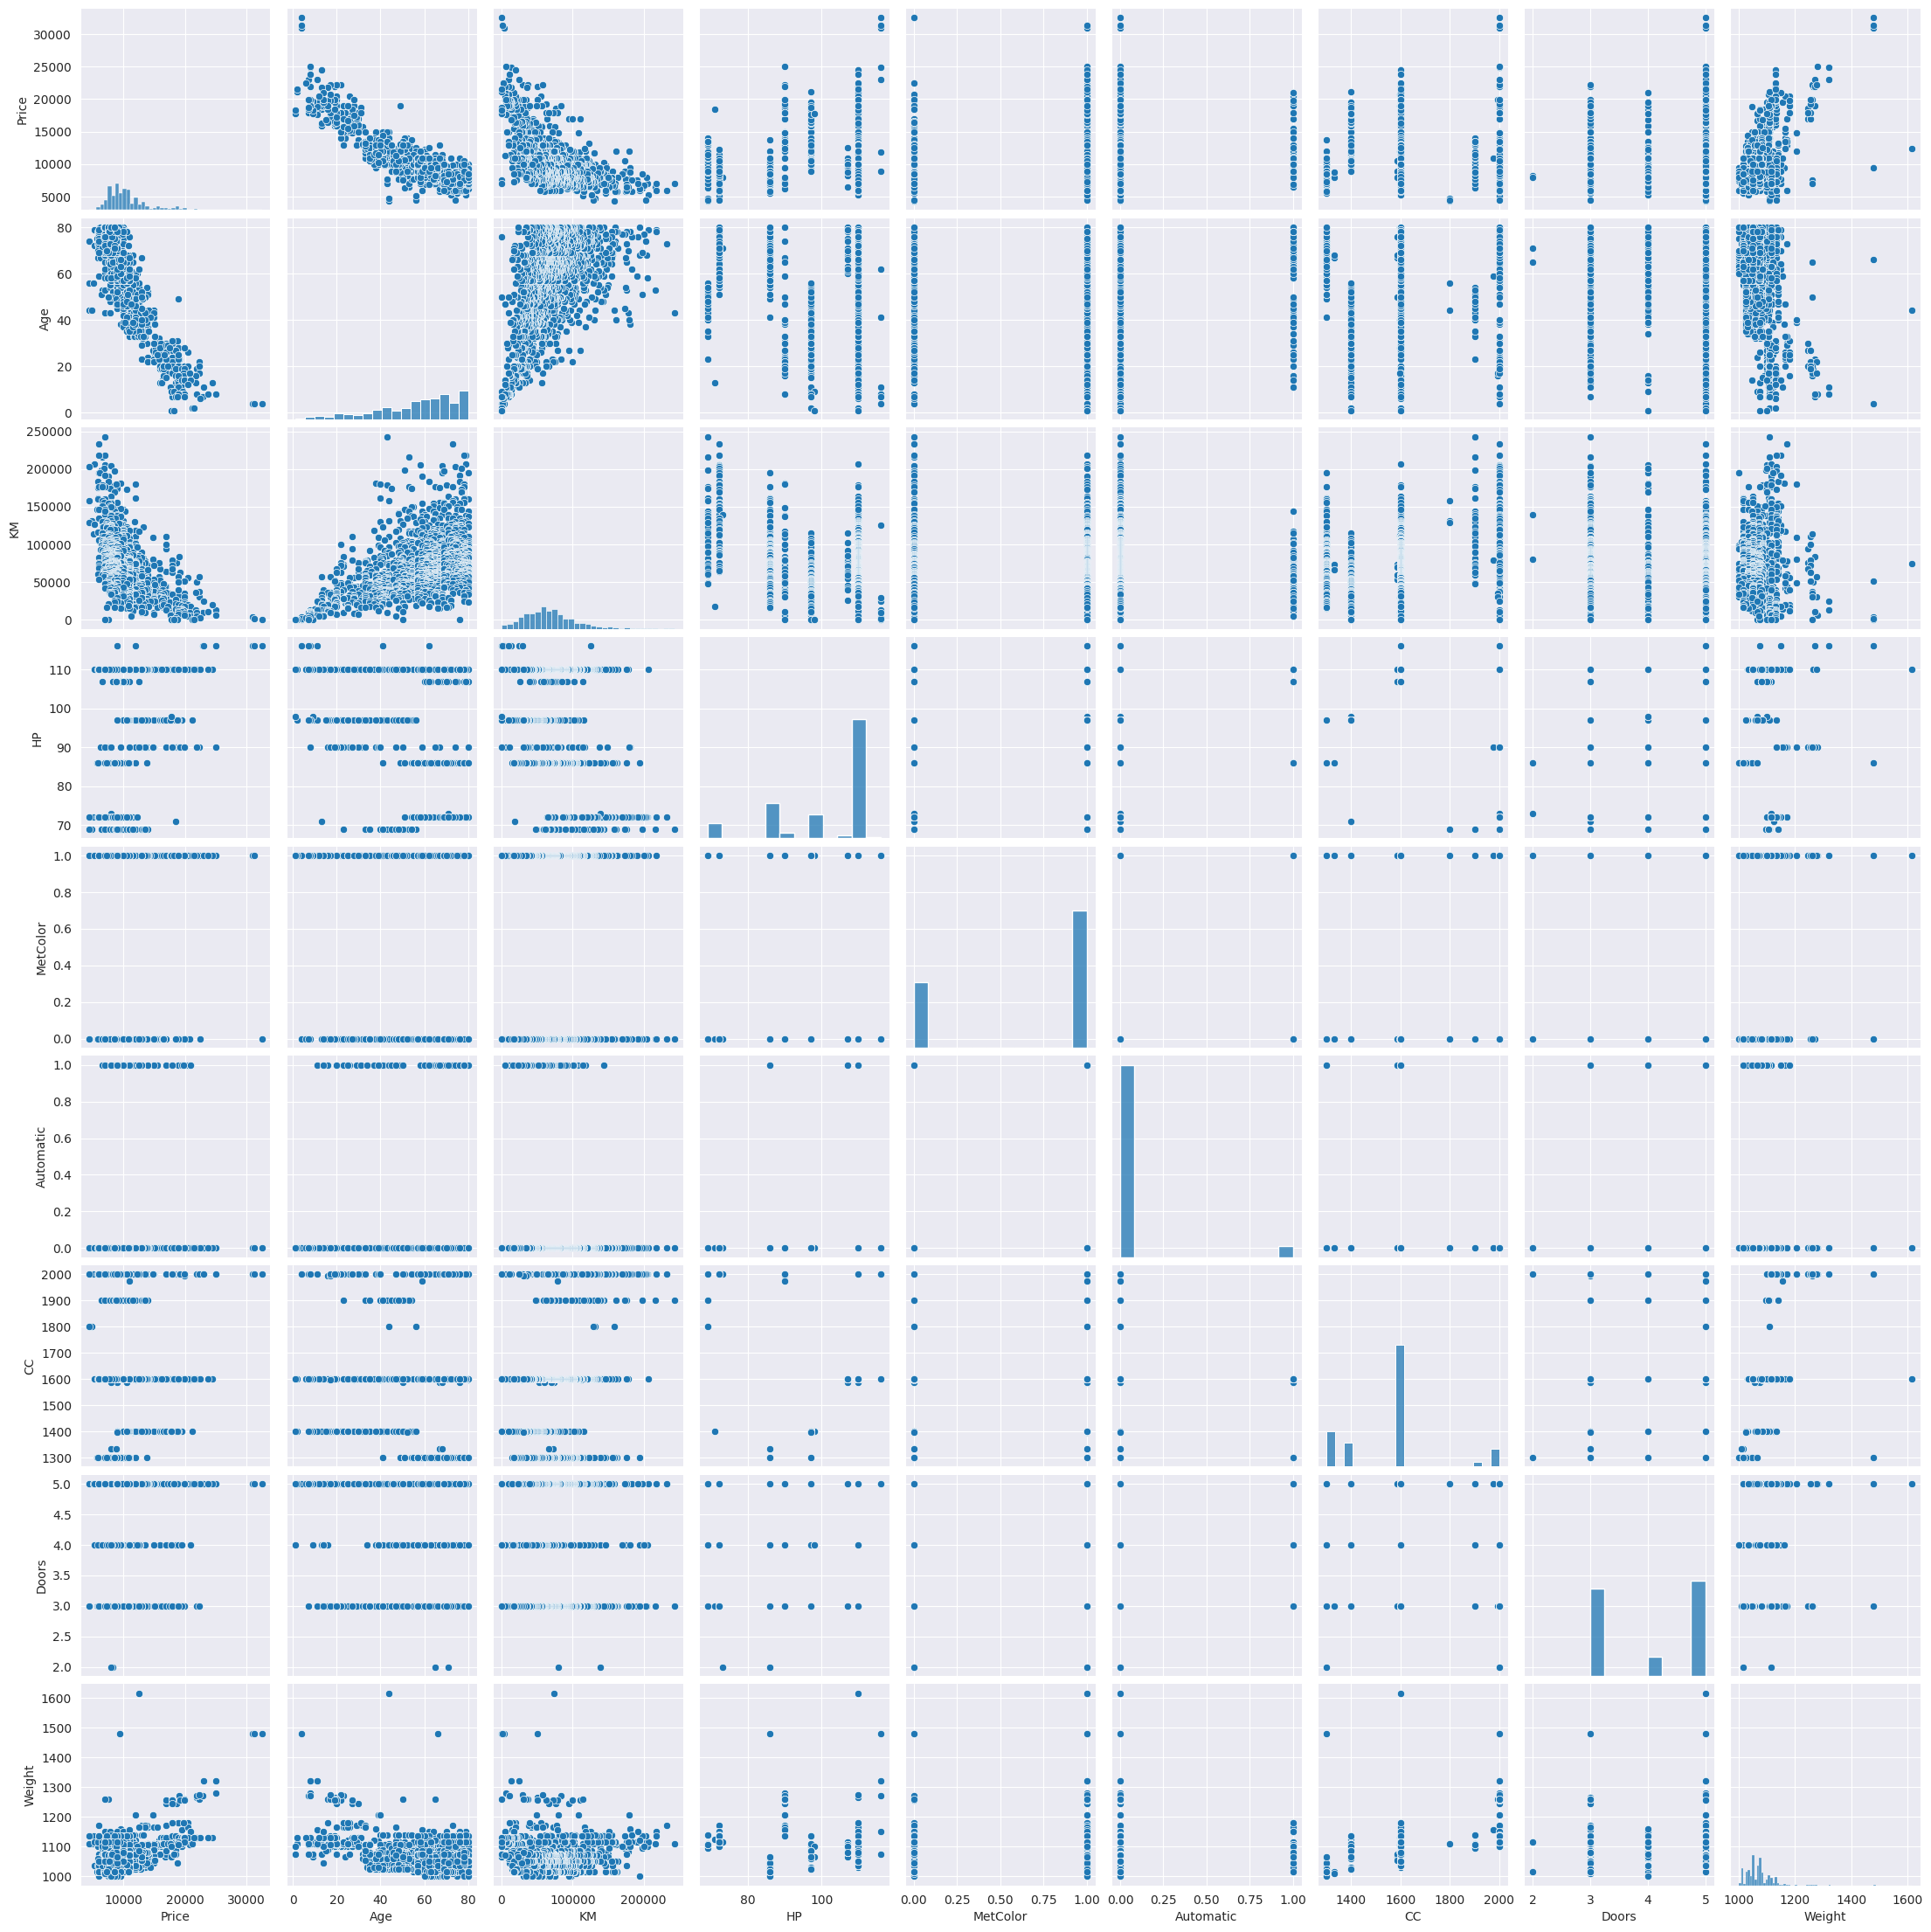

In [ ]:
sns.pairplot(dataset_num)

In [ ]:
dataset_num.describe()

Price          Age             KM           HP     MetColor  \
count   1425.000000  1425.000000    1425.000000  1425.000000  1425.000000   
mean   10646.220351    56.170526   68800.280000   100.803509     0.675789   
std     3508.671984    18.493082   37508.195872    12.744160     0.468243   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43120.000000    86.000000     0.000000   
50%     9900.000000    61.000000   63635.000000   110.000000     1.000000   
75%    11900.000000    70.000000   87358.000000   110.000000     1.000000   
max    32500.000000    80.000000  243000.000000   116.000000     1.000000   

         Automatic           CC        Doors       Weight  
count  1425.000000  1425.000000  1425.000000  1425.000000  
mean      0.056140  1565.028070     4.037193  1071.576842  
std       0.230273   186.774433     0.952167    51.870760  
min       0.000000  1300.000000     2.000000  1000.000000  
25%       0.000000  1400.000000     3.000000  1040.000000  
50%       0.000000  1600.000000     4.000000  1065.000000  
75%       0.000000  1600.000000     5.000000  1085.000000  
max       1.000000  2000.000000     5.000000  1615.000000

In [ ]:
scale_columns =  ['Age','KM','HP','CC','Weight']
features_to_scale = dataset_num.loc[:,scale_columns]
dataset_scaled = dataset_num.copy()
dataset_scaled[scale_columns]=features_to_scale

In [ ]:
dataset_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1425 non-null   int64
 1   Age        1425 non-null   int64
 2   KM         1425 non-null   int64
 3   HP         1425 non-null   int64
 4   MetColor   1425 non-null   int64
 5   Automatic  1425 non-null   int64
 6   CC         1425 non-null   int64
 7   Doors      1425 non-null   int64
 8   Weight     1425 non-null   int64
dtypes: int64(9)
memory usage: 111.3 KB


In [ ]:
root_transform_cols =["Age"]
df_root_transform = dataset_scaled[root_transform_cols].copy()
df_cube_transform = df_root_transform.copy()

for col in df_root_transform:
    df_root_transform[col] = df_root_transform[col].apply(lambda x : np.sqrt(x))
    df_cube_transform[col] = df_cube_transform[col].apply(lambda x : x**(1/3))


fig,ax = plt.subplots(ncols=ncol,figsize=(30, 5))
sns.distplot(df_root_transform['Age'],ax=ax[0])
sns.distplot(df_cube_transform['Age'],ax=ax[1])
plt.show()


<ipython-input-102-061bdd650622>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_root_transform['Age'],ax=ax[0])
<ipython-input-102-061bdd650622>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cube_transform['Age'],ax=ax[1])


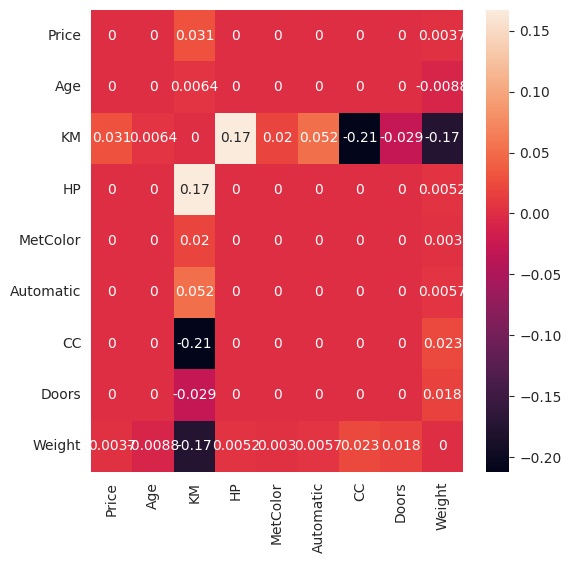

In [ ]:
dataset_scaled[log_transform_cols] = df_log_transform
data_corr_diff = dataset_scaled.corr()-data_corr

f, ax = plt.subplots(1,1,figsize=(6, 6))
sns.heatmap(data_corr_diff,annot=True)
plt.show()

#No much differences found in the correlations after transforming the values.

In [ ]:
dataset_categorical = dataset["FuelType"].copy()
lb_make = LabelEncoder()
dataset_categorical  = lb_make.fit_transform(dataset_categorical)
print(len(dataset_categorical))
print(dataset_categorical.min())
print(dataset_categorical.max())

1425
0
2


In [ ]:
#Put all features together
X = dataset_scaled.copy()
X["FuelType"]=dataset_categorical
X.drop("Price",axis=1,inplace=True)

y = dataset_scaled["Price"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1425 non-null   int64  
 1   KM         1425 non-null   float64
 2   HP         1425 non-null   int64  
 3   MetColor   1425 non-null   int64  
 4   Automatic  1425 non-null   int64  
 5   CC         1425 non-null   int64  
 6   Doors      1425 non-null   int64  
 7   Weight     1425 non-null   float64
 8   FuelType   1425 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 111.3 KB


In [ ]:
dataset_new = pd.concat([dataset_scaled, X["FuelType"]], axis=1)
dataset_new.head()

Price  Age         KM  HP  MetColor  Automatic    CC  Doors    Weight  \
0  13500   23  10.757626  90         1          0  2000      3  7.061334   
1  13750   23  11.197365  90         1          0  2000      3  7.061334   
2  13950   24  10.638544  90         1          0  2000      3  7.061334   
3  14950   26  10.778977  90         0          0  2000      3  7.061334   
4  13750   30  10.558439  90         0          0  2000      3  7.065613   

   FuelType  
0         1  
1         1  
2         1  
3         1  
4         1

In [ ]:
X = dataset_new.Weight
y = dataset_new.Price

In [ ]:
#Split train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
print('Shape of the raw data (x): {}'.format (X.shape))
print('Shape of the target variable (y): {}'.format (y.shape))

print('\nShape of the Train data (x_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (x_test): {}'.format (X_test.shape))
print('Shape of the target Test data (y_test): {}'.format (y_test.shape))


Shape of the raw data (x): (1425,)
Shape of the target variable (y): (1425,)

Shape of the Train data (x_train): (1140, 1)
Shape of the Train data (y_train): (1140, 1)

Shape of the Test data (x_test): (285, 1)
Shape of the target Test data (y_test): (285, 1)


In [ ]:
#Convert values into numpy arrays

y_train =  np.array(y_train).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)

y_test =  np.array(y_test).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [ ]:
# Involve linear regression model
L_model = LinearRegression()
# Let training data set to train our linear regression model
L_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Use the testing data set to test the accuracy of the model
# The accuracy_score function compares the true labels with the predicted labels
# and returns the accuracy score as a value between 0 and 1.
accuracy_L_model = L_model.score(X_test, y_test)
print('Score = ', accuracy_L_model)

Score =  0.38440291639363877


In [ ]:
from sklearn.svm import SVR  # for regression tasks

# For regression:
svm_model = SVR(kernel='linear')  # Similar to classification, you can change the kernel type

# Training the SVM:
# svm_classifier.fit(X_train, y_train)  # For classification
svm_model.fit(X_train, y_train)   # For regression

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
accuracy_svm = svm_model.score(X_test, y_test)  # Compare predicted labels with actual labels
print(f'Accuracy: {accuracy_svm *100:.2f}%')

Accuracy: -5.88%


In [ ]:
#TRAIN METRICS

y_predTrain = lr.predict(X_train)
y_predTrain = np.array(y_predTrain).reshape(-1, 1)

In [ ]:
MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_lTrain)

MAE: 2111.5119611207556
MSE: 8029523.5633255495
RMSE: 2833.641
R2 Score: 0.301462449678663


In [ ]:
# Multilinear Regression
#Split data into target and feature variables

features = dataset_new[["Age", "KM", "HP", "MetColor", "Automatic", "CC",
                           "Doors", "Weight", "FuelType"]]
target = dataset_scaled.Price

In [ ]:
X = features
y = target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [ ]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(X_test)

In [ ]:
#Plotting predicted vs real values

plt.style.use('seaborn')
plt.scatter(y_pred, y_test)
plt.title('Predicted Values vs Real values')
plt.xlabel('Predicted values')
plt.ylabel('Real Values')
plt.show()


In [ ]:
#Evaluate performance

#TEST METRICS

MAE_ml = metrics.mean_absolute_error(y_test, y_pred)
MSE_ml = metrics.mean_squared_error(y_test, y_pred)
RMSE_ml = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_ml = r2_score(y_test, y_pred)

print('MAE:', MAE_ml)
print('MSE:', MSE_ml)
print('RMSE:', round(RMSE_ml,3))
print('R2 Score:', R2_ml)

MAE: 971.9703338822268
MSE: 1964104.1458166172
RMSE: 1401.465
R2 Score: 0.8509338133557021


- R2 score improved from 0.301462449678663 to 0.8509338133557021

In [ ]:
# TRAIN METRICS

y_predTrain = mlr.predict(X_train)

MAE_mlTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_mlTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_mlTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_mlTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_mlTrain)
print('MSE:', MSE_mlTrain)
print('RMSE:', round(RMSE_mlTrain,3))
print('R2 Score:', R2_mlTrain)

MAE: 922.9338881156553
MSE: 1614471.6320343174
RMSE: 1270.619
R2 Score: 0.8639907155024832


In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.00000000e+00, 2.78481013e-01, 1.76768421e-01, ...,
        5.64878141e-02, 2.37671652e-01, 1.00000000e+00],
       [1.00000000e+00, 2.78481013e-01, 2.62479168e-01, ...,
        5.64878141e-02, 2.37671652e-01, 1.00000000e+00],
       [1.00000000e+00, 2.91139241e-01, 1.58410278e-01, ...,
        5.64878141e-02, 2.37671652e-01, 1.00000000e+00],
       ...,
       [1.00000000e+00, 8.86075949e-01, 6.76781476e-02, ...,
        5.80691992e-04, 4.81951032e-02, 4.00000000e+00],
       [1.00000000e+00, 8.73417722e-01, 6.72934790e-02, ...,
        5.80691992e-04, 4.81951032e-02, 4.00000000e+00],
       [1.00000000e+00, 9.49367089e-01, 0.00000000e+00, ...,
        2.89175005e-02, 3.40102928e-01, 4.00000000e+00]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 12)

In [ ]:
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor_poly2.predict(X_test)
y_pred

array([ 9613.85180071,  7289.18384758,  8254.21975122, 17229.51846794,
       11828.53766234,  8168.90807661,  8556.60078831, 17510.67802056,
       10299.96234022, 19398.73061241, 11759.42279657,  9257.36593473,
       10195.14494774, 10007.13206771,  8404.43531463,  9380.51698613,
        7496.22026075,  9573.82177678,  8446.58469717, 10156.94661167,
       18688.85145256,  7262.08708858, 10751.15346867,  9968.79326015,
       15283.0781051 , 11345.20137021,  9827.40437641, 10012.16395196,
       11761.79005085, 15233.33804282, 21266.34301933,  9245.66029304,
       16261.03250137,  8949.17670148,  8408.81160199, 12196.82878425,
        9374.40179148, 15217.20869404, 11218.13460142,  7685.53350064,
       10053.6643227 ,  8272.64218131,  9478.29262294,  8608.30533014,
       31003.80886948, 13329.00933183, 13784.57332002,  7801.50037512,
        9001.66919643, 10346.05270651,  9318.81815742,  8766.27981778,
       11596.00563835,  9614.68160631,  8822.92156201, 19388.74449793,
      

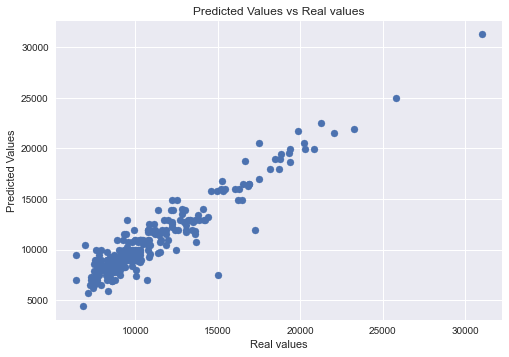

In [ ]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test,
          label = 'Test data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
#Evaluate performance

#TEST METRICS

MAE_pl = metrics.mean_absolute_error(y_test, y_pred)
MSE_pl = metrics.mean_squared_error(y_test, y_pred)
RMSE_pl = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_pl = r2_score(y_test, y_pred)

print('MAE:', round(MAE_pl,3))
print('MSE:', round(MSE_pl,3))
print('RMSE:', round(RMSE_pl,3))
print('R2 Score:', R2_pl)

MAE: 811.021
MSE: 1123630.582
RMSE: 1060.014
R2 Score: 0.9031894779790623


In [ ]:
#TRAIN METRICS

y_predTrain = regressor_poly2.predict(X_train)

MAE_plTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_plTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_plTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_plTrain = r2_score(y_train, y_predTrain)

print('MAE:', round(MAE_plTrain,3))
print('MSE:', round(MSE_plTrain,3))
print('RMSE:', round(RMSE_plTrain,3))
print('R2 Score:', R2_plTrain)

MAE: 804.012
MSE: 1091890.159
RMSE: 1044.935
R2 Score: 0.9098679248248699


- R2 score improved even more - the best result so far.

In [ ]:
cv_scores = cross_val_score(LinearRegression(), X_train, y_train,cv=10, scoring='r2') # Let's define the K and the scoring method

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.93 0.8  0.45 0.86 0.87 0.89 0.87 0.88 0.88 0.93]

Average 10-Fold CV R2_score: 0.836


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 10)

model_params_linreg = {
    'poly': {
         'model': LinearRegression(),
         'params': {}
    } ,
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1,0.5, 1.0, 10.0, 0.001,0.01,0.5,0.1]
            }
    },

    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha' : [0.1,0.5, 1.0, 10.0, 0.001,0.01,0.5,0.1]
            }
    },

    'svr': {
        'model': SVR(),
        'params': {
            'C': [0.01, 0.1, 0.5, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': [1, 0.75, 0.5, 0.25, 0.1],
            'degree':[2,3]
        }
    }
}

metrics_dev = ['r2']


The code uses RandomizedSearchCV to find optimal hyperparameters for linear regression models. It iterates through various model parameters, fits the models to training data using cross-validation, and records performance metrics. The process is timed from start to finish using the 'time' module.

In [ ]:

import time
start = time.time()

scores_randomized = []

for model_name, mp in model_params_linreg.items():
    print("{} model training in progress...".format(model_name))
    regr =  RandomizedSearchCV(mp['model'], mp['params'], cv=10, scoring=metrics_dev, refit='r2', n_iter=8)
    regr.fit(X_train, y_train)
    scores_randomized.append({
        'model': model_name,
        'best_score': regr.best_score_,
        'best_params': regr.best_params_,
        'Avg MAE': regr.cv_results_['mean_test_r2'],
        'Avg RMSE' : regr.cv_results_['mean_test_r2'],
        'Avg R1': regr.cv_results_['mean_test_r2']
    })
    print("{} model training finished".format(model_name),"\n")

end = time.time()

poly model training in progress...
poly model training finished 

ridge model training in progress...


/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=8. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


ridge model training finished 

lasso model training in progress...


/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520847874.4403853, tolerance: 1279728.3591938596
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495201004.4025613, tolerance: 1294147.9528218326
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527477614.1391293, tolerance: 1234028.5257443471
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate

/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594146014.050963, tolerance: 1279728.3591938596
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551242640.804358, tolerance: 1294147.9528218326
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600256967.4300678, tolerance: 1234028.5257443471
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_d

/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114368140.68548787, tolerance: 1293263.4761017545
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520847874.4403853, tolerance: 1279728.3591938596
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495201004.4025613, tolerance: 1294147.9528218326
  positive)
/Users/mimmo/opt/anaconda3/envs/DataAnalytics/lib/python3.7/site-packages/sklearn/linear_model/_coordinat

lasso model training finished 

svr model training in progress...
svr model training finished 



## Model Evaluation

In [ ]:
results_randomized = pd.DataFrame(scores_randomized,columns=['model','best_score','best_params','Avg MAE','Avg RMSE','Avg R1'])
results_randomized


model  best_score                                        best_params  \
0   poly    0.789860                                                 {}   
1  ridge    0.871875                                     {'alpha': 0.1}   
2  lasso    0.872857                                     {'alpha': 1.0}   
3    svr    0.828124  {'kernel': 'poly', 'gamma': 1, 'degree': 3, 'C...   

                                             Avg MAE  \
0                               [0.7898602204266316]   
1  [0.8718751876685962, 0.868409577491111, 0.8665...   
2  [0.8626421959188203, 0.8714069916390621, 0.872...   
3  [-0.0473560577558656, 0.003490373110472422, 0....   

                                            Avg RMSE  \
0                               [0.7898602204266316]   
1  [0.8718751876685962, 0.868409577491111, 0.8665...   
2  [0.8626421959188203, 0.8714069916390621, 0.872...   
3  [-0.0473560577558656, 0.003490373110472422, 0....   

                                              Avg R1  
0                               [0.7898602204266316]  
1  [0.8718751876685962, 0.868409577491111, 0.8665...  
2  [0.8626421959188203, 0.8714069916390621, 0.872...  
3  [-0.0473560577558656, 0.003490373110472422, 0....

- There is an improvement of the ridge and lasso regularization results compared to the original poly model.
- Since the polynomial features are used it would be expected that the non-linear poly kernel is more efficient then the linear kernel. That is not the case and the SVR performs poorly.

In [ ]:
#Train model with best result
best_model = Lasso(alpha=1,tol=0.01)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
#TEST METRICS

MAE_bm = metrics.mean_absolute_error(y_test, y_pred)
MSE_bm = metrics.mean_squared_error(y_test, y_pred)
RMSE_bm = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_bm = r2_score(y_test, y_pred)

print('MAE:', round(MAE_bm,3))
print('MSE:', round(MSE_bm,3))
print('RMSE:', round(RMSE_bm,3))
print('R2 Score:', R2_bm)

MAE: 811.021
MSE: 1123630.582
RMSE: 1060.014
R2 Score: 0.9031894779790623


In [ ]:
#TRAIN METRICS

y_predTrain = best_model.predict(X_train)

MAE_bmTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_bmTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_bmTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_bmTrain = r2_score(y_train, y_predTrain)

print('MAE:', round(MAE_bmTrain,3))
print('MSE:', round(MSE_bmTrain,3))
print('RMSE:', round(RMSE_bmTrain,3))
print('R2 Score:', R2_bmTrain)

MAE: 836.448
MSE: 1247135.226
RMSE: 1116.752
R2 Score: 0.8998057829187613


***FINAL PRICE PREDICTION FIGURE***

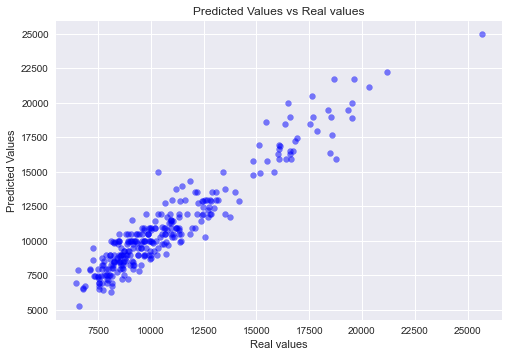

In [ ]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'blue', marker = 'o', s = 35, alpha = 0.5)

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.show()

Among the models tested for predicting car prices, the one with polynomial features and regularization performed the best. It achieved a high score (R2) of 0.891 on the test data, meaning it's good at predicting car prices. The similar performance on both training and test data suggests it's not memorizing the training data (overfitting). The model's errors, like MAE and RMSE, are reasonably low (843.479 and 1191.474, respectively), indicating accurate predictions. In simple terms, this model is reliable for estimating car prices.